In [1]:
#-----------------------------IDEAS/NOTES--------------------------------------
# normalize data prior to prediction
#facebook profit for modelling

**Data Wrangling & Feature Engineering**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
%matplotlib inline 

os.getcwd()
os.chdir('C:\\Users\\amit_\\Desktop\\SPRINGBOARD PROJECTS\\Project-Cap3')
os.listdir()

['.ipynb_checkpoints',
 '1-s2.0-S096014811831231X-main.pdf',
 'archive.zip',
 'data',
 'Data-Wrangling-EDA.ipynb',
 'figures',
 'Problem Statement.odt']

In [3]:
raw_data = pd.read_csv('data/T1.csv')
raw_data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


**Information about features**

-Date/Time (for 10 minutes intervals)

-LV ActivePower (kW): The power generated by the turbine for that moment

-Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)

-TheoreticalPowerCurve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer

-Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [5]:
raw_data['Date/Time'] = pd.to_datetime(raw_data['Date/Time'])  #convert the date column to datetime object

In [6]:
raw_data.set_index('Date/Time',inplace=True) #set the index to the Date time column

In [7]:
raw_data.columns

Index(['LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [8]:
raw_data.columns = ['Power','Wind_speed','Theoretical_power','Wind_direction'] #change column names

In [9]:
raw_data.describe()

,Power,Wind_speed,Theoretical_power,Wind_direction
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [10]:
print(raw_data.index.min())
print(raw_data.index.max())

2018-01-01 00:00:00
2018-12-31 23:50:00


The turbine has recorded data for the year of 2018

In [11]:
raw_data['Loss'] = raw_data['Theoretical_power'] - raw_data['Power']
raw_data.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss
Date/Time,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429


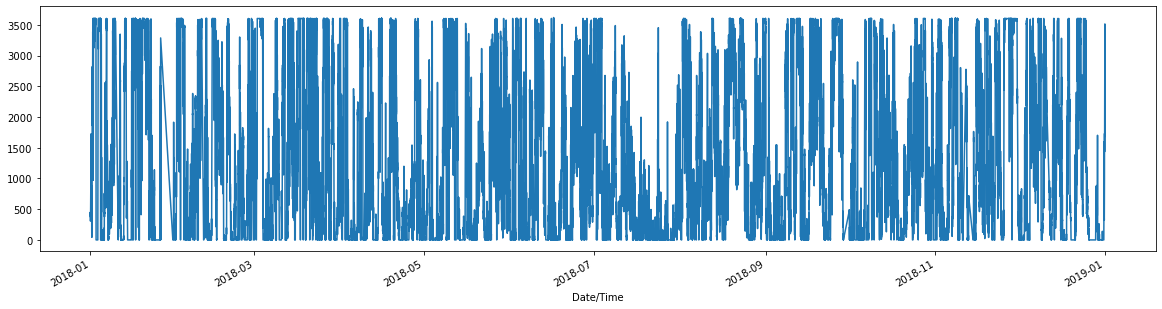

In [12]:
raw_data['Power'].plot(figsize=(20,5)) # due to the random noise, the data will be resampled by every hour
plt.show()

In [13]:
# create an hourly data frame resampled by the mean
hourly = pd.DataFrame()

for col in raw_data.columns:
    hourly[col] = raw_data[col].resample('H').mean()

hourly.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss
Date/Time,,,,,
2018-01-01 00:00:00,390.480362,5.506868,472.402227,267.118632,81.921865
2018-01-01 01:00:00,460.537125,5.644205,513.418408,258.945546,52.881284
2018-01-01 02:00:00,733.655375,6.452037,788.401310,268.397466,54.745935


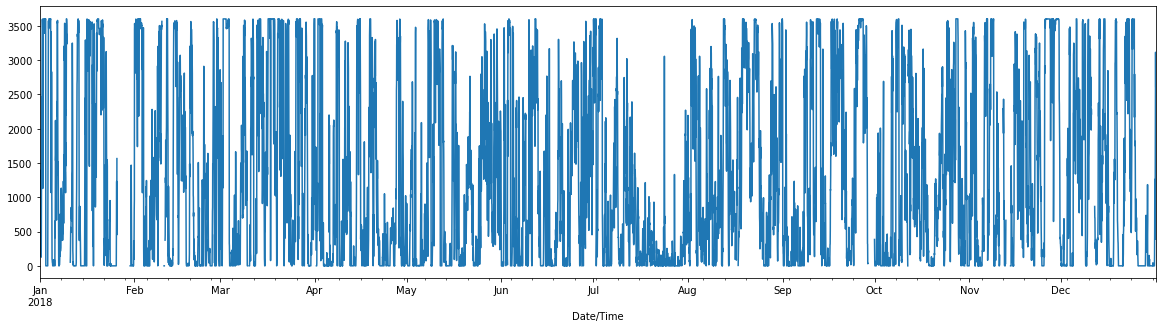

In [14]:
hourly['Power'].plot(figsize=(20,5))
plt.show()

In [15]:
# create an daily data frame resampled by the mean
daily = pd.DataFrame()

for col in raw_data.columns:
    daily[col] = raw_data[col].resample('D').mean()

daily.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss
Date/Time,,,,,
2018-01-01,1535.204483,8.022975,1622.990048,229.735242,87.785565
2018-01-02,3402.762686,14.954779,3443.060749,201.743605,40.298063
2018-01-03,946.059177,6.628723,1189.168580,143.141018,243.109404


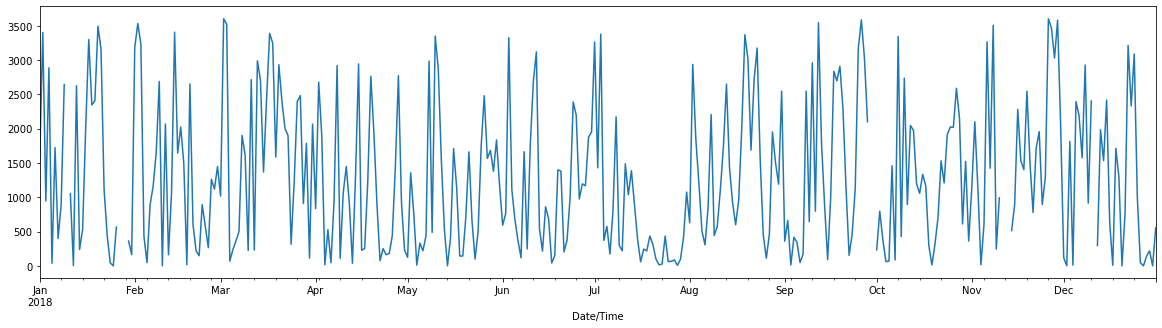

In [16]:
daily['Power'].plot(figsize=(20,5),label='daily')
plt.show()

The daily plot has less noise and seems more manageable so the final model will be carried forward using a daily timestep.

In [17]:
# create an weekly and monthly data frame resampled by the mean
weekly = pd.DataFrame()
monthly = pd.DataFrame()

for col in raw_data.columns:
    weekly[col] = raw_data[col].resample('W').mean()

for col in raw_data.columns:
    monthly[col] = raw_data[col].resample('M').mean()


In [18]:
# create a function for a categorical column 
def direction(x):
    if x > 348.75 or x<11.25: return 'N'
    if x < 33.75: return 'NNE'
    if x < 56.25: return 'NE'
    if x < 78.75: return 'ENE'
    if x < 101.25: return 'E'
    if x < 123.75: return 'ESE'
    if x < 146.25: return 'SE'
    if x < 168.75: return 'SSE'
    if x < 191.25: return 'S'
    if x < 213.75: return 'SSW'
    if x < 236.25: return 'SW'
    if x < 258.75: return 'WSW'
    if x < 281.25: return 'W'
    if x < 303.75: return 'WNW'
    if x < 326.25: return 'NW'
    else: return 'NNW'

In [19]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Freq: D
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Power              356 non-null    float64
 1   Wind_speed         356 non-null    float64
 2   Theoretical_power  356 non-null    float64
 3   Wind_direction     356 non-null    float64
 4   Loss               356 non-null    float64
dtypes: float64(5)
memory usage: 17.1 KB


In [20]:
missing = daily[daily.isnull().any(axis=1)]
print(missing)

            Power  Wind_speed  Theoretical_power  Wind_direction  Loss
Date/Time                                                             
2018-01-10    NaN         NaN                NaN             NaN   NaN
2018-01-27    NaN         NaN                NaN             NaN   NaN
2018-01-28    NaN         NaN                NaN             NaN   NaN
2018-01-29    NaN         NaN                NaN             NaN   NaN
2018-09-29    NaN         NaN                NaN             NaN   NaN
2018-09-30    NaN         NaN                NaN             NaN   NaN
2018-11-11    NaN         NaN                NaN             NaN   NaN
2018-11-13    NaN         NaN                NaN             NaN   NaN
2018-12-11    NaN         NaN                NaN             NaN   NaN


In [21]:
# replace all Nan values with interpolated values for each column
for col in daily.columns:
    daily[col] = daily[col].interpolate()

In [22]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Freq: D
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Power              365 non-null    float64
 1   Wind_speed         365 non-null    float64
 2   Theoretical_power  365 non-null    float64
 3   Wind_direction     365 non-null    float64
 4   Loss               365 non-null    float64
dtypes: float64(5)
memory usage: 17.1 KB


In [23]:
daily['Direction'] = daily['Wind_direction'].apply(direction)

In [24]:
daily.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss,Direction
Date/Time,,,,,,
2018-01-01,1535.204483,8.022975,1622.990048,229.735242,87.785565,SW
2018-01-02,3402.762686,14.954779,3443.060749,201.743605,40.298063,SSW
2018-01-03,946.059177,6.628723,1189.168580,143.141018,243.109404,SE


In [25]:
daily['Direction'].unique()

array(['SW', 'SSW', 'SE', 'WSW', 'NE', 'ENE', 'E', 'WNW', 'NNE', 'SSE',
       'W', 'ESE', 'S', 'NW'], dtype=object)

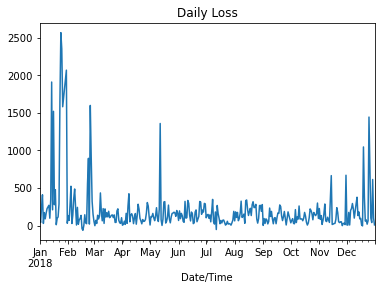

In [26]:
daily['Loss'].plot()
plt.title('Daily Loss')
plt.show()

There are times throughout the year where the turbine has experienced a large amount of Power loss. This is worth investigating further. I suspect this is due to maintenance. 

Between 12-14km/h (**3.3-3.8m/s**) a wind turbine starts to generate electricity.
If the wind speed is higher than 3.3m/s and the power output is zero, we can assume the turbine is under maintenance

In [27]:
print(max(raw_data['Wind_speed']))

25.2060108184814


In [28]:
#check number of data points in raw_data where the wind speed is above 3.3 and power is less than zero
#create a dataframe where times of maintenance are not included
raw_data_nm = raw_data[~((raw_data['Power']<=0) & (raw_data['Wind_speed'] > 3.3))]

In [29]:
raw_data_nm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47901 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Power              47901 non-null  float64
 1   Wind_speed         47901 non-null  float64
 2   Theoretical_power  47901 non-null  float64
 3   Wind_direction     47901 non-null  float64
 4   Loss               47901 non-null  float64
dtypes: float64(5)
memory usage: 2.2 MB


In [30]:
raw_data_nm.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss
Date/Time,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429


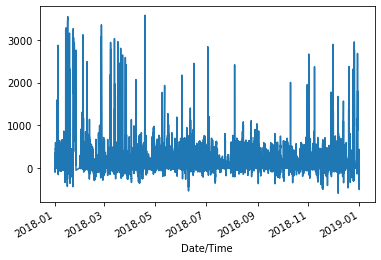

In [31]:
# filtered loss
_ = raw_data_nm['Loss'].plot()


In [32]:
daily_nm = pd.DataFrame()
weekly_nm = pd.DataFrame()
monthly_nm = pd.DataFrame()
columns = ['Power','Wind_speed','Theoretical_power','Wind_direction','Loss']

for column in columns:
    daily_nm[column] = raw_data_nm[column].resample('D').mean()

for column in columns:
    weekly_nm[column] = raw_data_nm[column].resample('W').mean()
    
for column in columns:
    monthly_nm[column] = raw_data_nm[column].resample('M').mean()
    

In [33]:
daily_nm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Freq: D
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Power              355 non-null    float64
 1   Wind_speed         355 non-null    float64
 2   Theoretical_power  355 non-null    float64
 3   Wind_direction     355 non-null    float64
 4   Loss               355 non-null    float64
dtypes: float64(5)
memory usage: 17.1 KB


In [34]:
for column in daily_nm.columns:
    daily_nm[column] = daily_nm[column].interpolate()

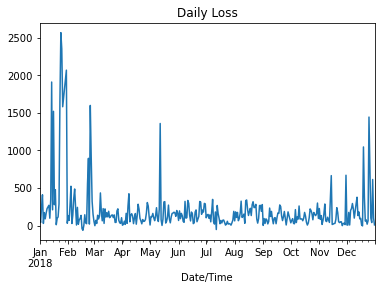

In [35]:
daily['Loss'].plot()
plt.title('Daily Loss')
plt.show()

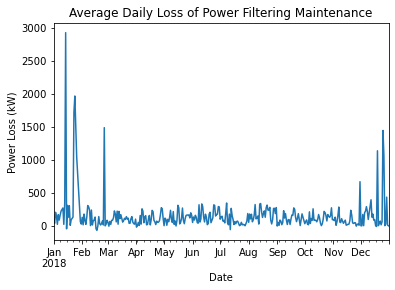

In [36]:
_ = daily_nm['Loss'].plot()
_ = plt.title('Average Daily Loss of Power Filtering Maintenance')
_ = plt.ylabel('Power Loss (kW)')
_ = plt.xlabel('Date')

From filtering the data when the wind turbine is under maintenance, there are Dates throughout the year when the power loss is minimized, however during January, Febuary and December, there is still extreme power loss. I will investigate this further.

In [37]:
daily_nm[daily_nm['Loss']> 500]

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss
Date/Time,,,,,
2018-01-14,644.808732,14.718362,3567.596514,35.905863,2922.787782
2018-01-23,545.091323,9.581542,2263.252593,23.654861,1718.161270
2018-01-24,620.637732,9.697221,2585.850100,27.299960,1965.212369
2018-01-25,1045.475072,9.639311,2548.468187,38.263716,1502.993116
2018-01-26,1470.312411,9.581401,2511.086275,49.227472,1040.773863
2018-01-27,1384.293501,8.945226,2180.735582,111.541649,796.442081
2018-01-28,1298.274590,8.309051,1850.384889,173.855826,552.110298
2018-02-25,349.677308,8.447680,1836.791469,47.212447,1487.114161
2018-11-30,2042.451834,11.883966,2712.258474,32.449179,669.806640


In [38]:
daily_nm[((daily_nm['Wind_speed']<6) & (daily_nm['Power']<100))].head()


,Power,Wind_speed,Theoretical_power,Wind_direction,Loss
Date/Time,,,,,
2018-01-05,42.395439,3.023097,67.995904,256.152420,25.600465
2018-01-12,6.025983,2.499986,31.272477,110.304554,25.246495
2018-02-05,48.126384,2.700684,73.094214,151.831353,24.967830
2018-02-10,0.000000,2.199308,6.207335,260.142045,6.207335
2018-02-18,16.765222,2.140284,16.872619,132.931491,0.107397


It seems the turbine was functioning normally whilst the power output was low. I will keep these data points in my analysis as our model can consider the intermittency  of the wind and whilst the turbine is not as effcient as it should be.  

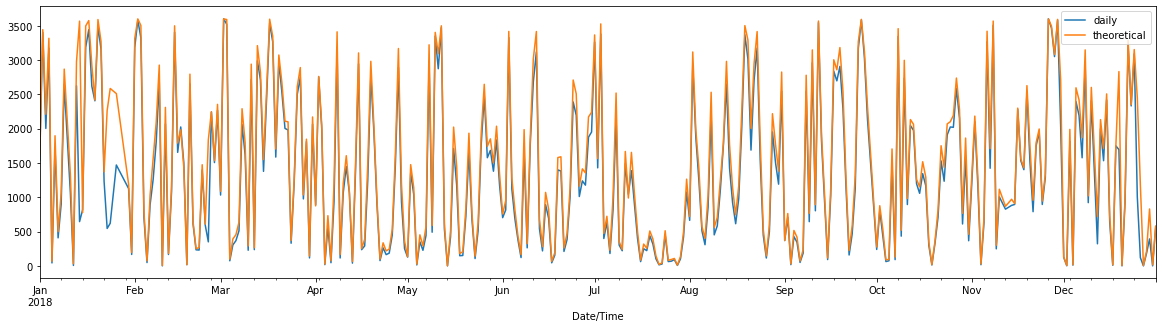

In [39]:
daily_nm['Power'].plot(figsize=(20,5),label='daily')
daily_nm['Theoretical_power'].plot(label='theoretical')
plt.legend()
plt.show()

In [40]:
raw_data['Direction'] = raw_data['Wind_direction'].apply(direction)

In [41]:
raw_data.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss,Direction
Date/Time,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117,W
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316,W
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429,W


In [42]:
#add the direction column to the daily,weekly,monthly dataframes no maintenance dataframe
dfs = [daily_nm, weekly_nm, monthly_nm]

for df in dfs:
    df['Direction'] = df['Wind_direction'].apply(direction)

monthly_nm.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss,Direction
Date/Time,,,,,,
2018-01-31,1850.697339,9.677318,2113.510437,151.037688,262.813098,SSE
2018-02-28,1563.237064,8.278136,1698.103519,123.957022,134.866455,SE
2018-03-31,1832.531394,9.310503,1932.329374,158.755229,99.797980,SSE


In [43]:
#create a function for the mean wind speed
def mean_wind(x):
    intervals = [*np.arange(0.25,26,0.5)]

    for i in intervals:
            if x < i: 
                x=i-0.25
                return x

In [44]:
raw_data_nm['Mean_speed'] = raw_data_nm['Wind_speed'].apply(mean_wind)

C:\Users\amit_\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
#add mean wind speed for raw data no maintenance 
raw_data_nm.sample(5)


,Power,Wind_speed,Theoretical_power,Wind_direction,Loss,Mean_speed
Date/Time,,,,,,
2018-03-09 17:10:00,1411.401001,8.120815,1599.923006,56.053082,188.522005,8.0
2018-06-26 13:10:00,365.166809,5.379687,435.046266,71.048798,69.879457,5.5
2018-06-30 07:10:00,1711.009033,8.661868,1928.709338,192.211700,217.700305,8.5
2018-09-24 02:40:00,177.505798,4.432246,207.794573,80.073357,30.288774,4.5
2018-06-29 17:50:00,1738.498047,8.783034,2005.171897,228.263199,266.673850,9.0


**Exploratory Data Analysis (EDA)**


**Null Hypothesis (H0)**: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. 
\
\
**Alternate Hypothesis (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
\
\
**p-value > 0.05**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
\
**p-value <= 0.05**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [46]:
# check stationairy in data using adfuller test
from statsmodels.tsa.stattools import adfuller

X = raw_data_nm['Power'].values
result = adfuller(X)

print('p-value: %f' % result[1])

p-value: 0.000000


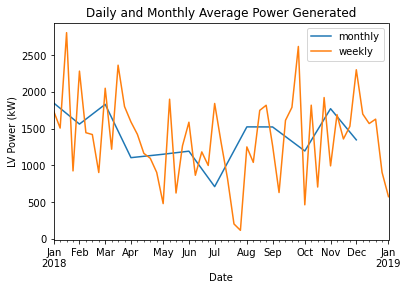

In [47]:
#daily['Power'].plot(figsize=(20,5),label='daily')
monthly_nm['Power'].plot(label='monthly')
weekly_nm['Power'].plot(label='weekly')
plt.title('Daily and Monthly Average Power Generated')
plt.ylabel('LV Power (kW)')
plt.xlabel('Date')
plt.legend()
plt.show()

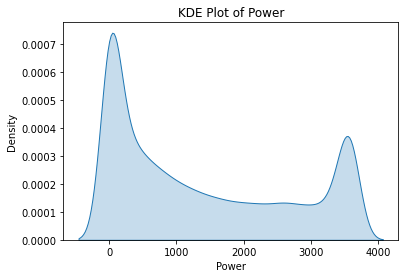

In [48]:
sns.kdeplot(raw_data_nm['Power'],shade=True)
plt.title('KDE Plot of Power')
plt.show()

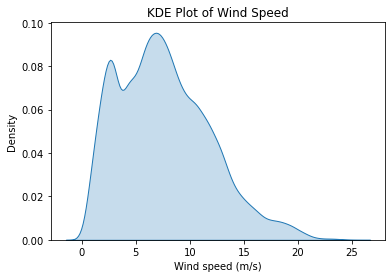

In [49]:
sns.kdeplot(raw_data_nm['Wind_speed'],shade=True)
plt.title('KDE Plot of Wind Speed')
plt.xlabel('Wind speed (m/s)')
plt.show()

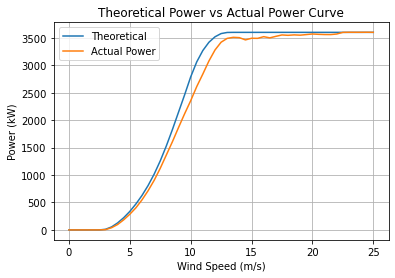

In [50]:
m_s_t_se = raw_data_nm.groupby('Mean_speed')['Theoretical_power'].mean()
m_s_p_se = raw_data_nm.groupby('Mean_speed')['Power'].mean()
plt.plot(m_s_t_se,label='Theoretical')
plt.plot(m_s_p_se,label='Actual Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Theoretical Power vs Actual Power Curve')
plt.grid(which='major')
plt.legend()
plt.show()

In [51]:
raw_data.columns

Index(['Power', 'Wind_speed', 'Theoretical_power', 'Wind_direction', 'Loss',
       'Direction'],
      dtype='object')

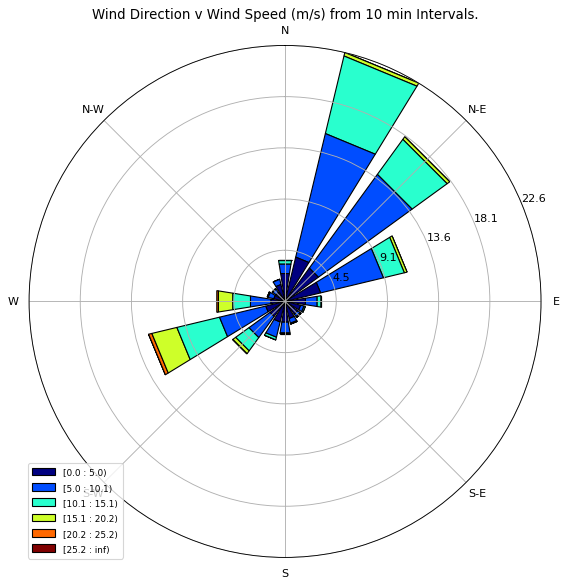

In [52]:
ax = WindroseAxes.from_ax()
ax.bar(raw_data['Wind_direction'], raw_data['Wind_speed'], normed=True, opening=0.8, edgecolor='black')
ax.set_theta_direction('clockwise')
ax.set_theta_zero_location('N')
ax.set_xticklabels(['N', 'N-E', 'E', 'S-E', 'S', 'S-W', 'W', 'N-W'])
ax.set_legend()
plt.title('Wind Direction v Wind Speed (m/s) from 10 min Intervals.')
plt.show()

In [53]:
raw_data_nm['Direction'] = raw_data_nm['Wind_direction'].apply(direction)

C:\Users\amit_\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


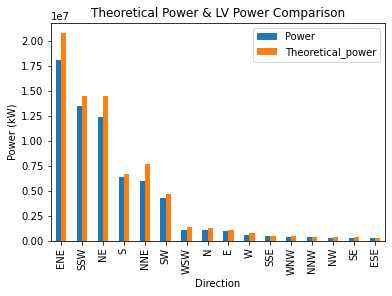

In [54]:
direction_df = raw_data.groupby('Direction')[['Power','Theoretical_power']].sum()
direction_df = direction_df.sort_values(by=['Power'],ascending=False)
direction_df.plot(kind='bar')
plt.title('Theoretical Power & LV Power Comparison')
plt.ylabel('Power (kW)')
plt.show()


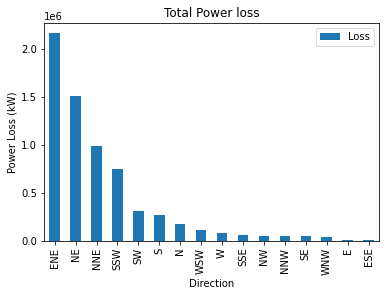

In [55]:
# summary df of grouped daily direction 
dir_loss = raw_data_nm.groupby('Direction')[['Loss']].sum()
dir_loss = dir_loss.sort_values(by=['Loss'],ascending=False)
dir_loss.plot(kind='bar')
plt.title('Total Power loss')
plt.ylabel('Power Loss (kW)')
plt.show()

Consider the greatest power loss were in ENE, NE, NNE and SSW. I will investigate this further.




In [56]:
raw_data_nm.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss,Mean_speed,Direction
Date/Time,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117,5.5,W
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316,5.5,W
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429,5.0,W


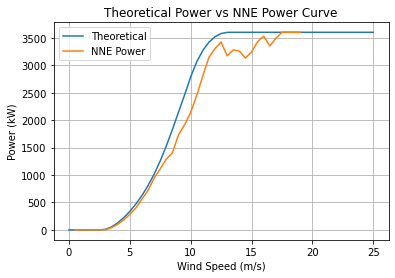

In [57]:
NNE = raw_data_nm[raw_data_nm['Direction']=='NNE']
m_s_p_nne = NNE.groupby('Mean_speed')['Power'].mean()
plt.plot(m_s_t_se,label='Theoretical')
plt.plot(m_s_p_nne,label='NNE Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Theoretical Power vs NNE Power Curve')
plt.grid(which='major')
plt.legend()
plt.show()


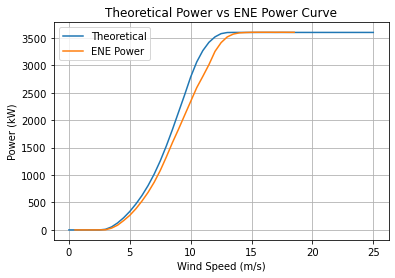

In [58]:
ENE = raw_data_nm[raw_data_nm['Direction']=='ENE']
m_s_p_ene = ENE.groupby('Mean_speed')['Power'].mean()
plt.plot(m_s_t_se,label='Theoretical')
plt.plot(m_s_p_ene,label='ENE Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Theoretical Power vs ENE Power Curve')
plt.grid(which='major')
plt.legend()
plt.show()

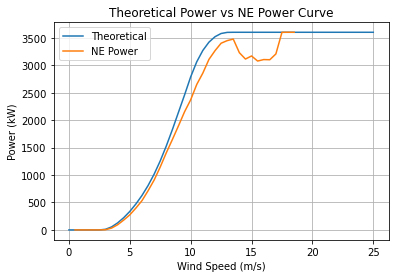

In [59]:
NE = raw_data_nm[raw_data_nm['Direction']=='NE']
m_s_p_ne = NE.groupby('Mean_speed')['Power'].mean()
plt.plot(m_s_t_se,label='Theoretical')
plt.plot(m_s_p_ne,label='NE Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Theoretical Power vs NE Power Curve')
plt.grid(which='major')
plt.legend()
plt.show()

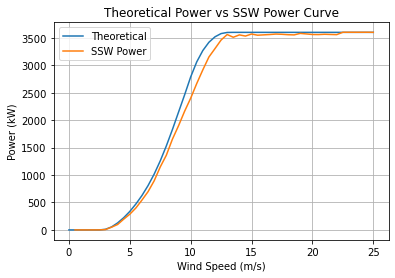

In [60]:
SSW = raw_data_nm[raw_data_nm['Direction']=='SSW']
m_s_p_ssw = SSW.groupby('Mean_speed')['Power'].mean()
plt.plot(m_s_t_se,label='Theoretical')
plt.plot(m_s_p_ssw,label='SSW Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Theoretical Power vs SSW Power Curve')
plt.grid(which='major')
plt.legend()
plt.show()

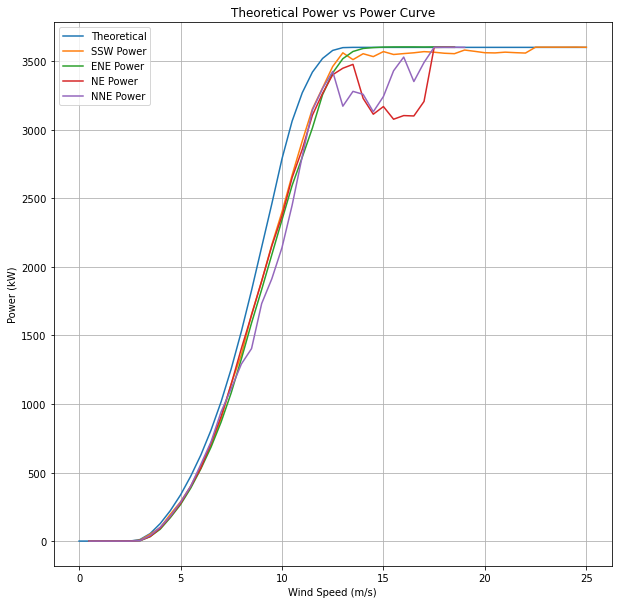

In [61]:
SSW = raw_data_nm[raw_data_nm['Direction']=='SSW']
m_s_p_ssw = SSW.groupby('Mean_speed')['Power'].mean()
plt.figure(figsize=(10,10))
plt.plot(m_s_t_se,label='Theoretical')
plt.plot(m_s_p_ssw,label='SSW Power')
plt.plot(m_s_p_ene,label='ENE Power')
plt.plot(m_s_p_ne,label='NE Power')
plt.plot(m_s_p_nne,label='NNE Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Theoretical Power vs Power Curve')
plt.grid(which='major')
plt.legend()
plt.show()